In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crime_csv_all_years.csv')
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,2,16.0,30.0,8XX RICHARDS ST,Central Business District,491347.04,5458514.73
1,Theft of Vehicle,2003,9,12,23.0,0.0,10XX E 54TH AVE,Sunset,493799.39,5451973.70
2,Other Theft,2003,6,29,15.0,45.0,65XX FRASER ST,Sunset,493394.25,5452440.64
3,Theft from Vehicle,2003,8,27,18.0,0.0,8XX BURRARD ST,Central Business District,491066.19,5458945.81
4,Break and Enter Residential/Other,2003,11,13,13.0,36.0,22XX E PENDER ST,Grandview-Woodland,495705.71,5458615.07


In [12]:
df['TYPE'].unique()

array(['Theft from Vehicle', 'Theft of Vehicle', 'Other Theft',
       'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Theft of Bicycle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Offence Against a Person',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Homicide'], dtype=object)

In [2]:
def prepare_data(df, year, crime):
    nb_list = df[df['YEAR']==year].copy()
    nb_list = nb_list[nb_list['TYPE']==crime]

    #clean
    notin = ['Musqueam', 'Stanley Park']
    nb_list[~nb_list.NEIGHBOURHOOD.isin(notin)]
    nb_list = nb_list.replace('Central Business District','Downtown')
    nb_list = nb_list.replace('Arbutus Ridge','Arbutus-Ridge')

    #group and count
    nb_list = nb_list.groupby(['NEIGHBOURHOOD']).count()
    nb_list = nb_list[['TYPE']].add_suffix('_Count').reset_index()
    
    return nb_list

In [3]:
import geopandas as gpd

lbnd = 'local_area_boundary.shp'
lbnd_df = gpd.read_file(lbnd)

In [4]:
nb_list = prepare_data(df, 2013, 'Theft of Vehicle')
    
lbnd = 'local_area_boundary.shp'
lbnd_df = gpd.read_file(lbnd)
bound = lbnd_df.set_index('NAME').join(nb_list.set_index('NEIGHBOURHOOD'))

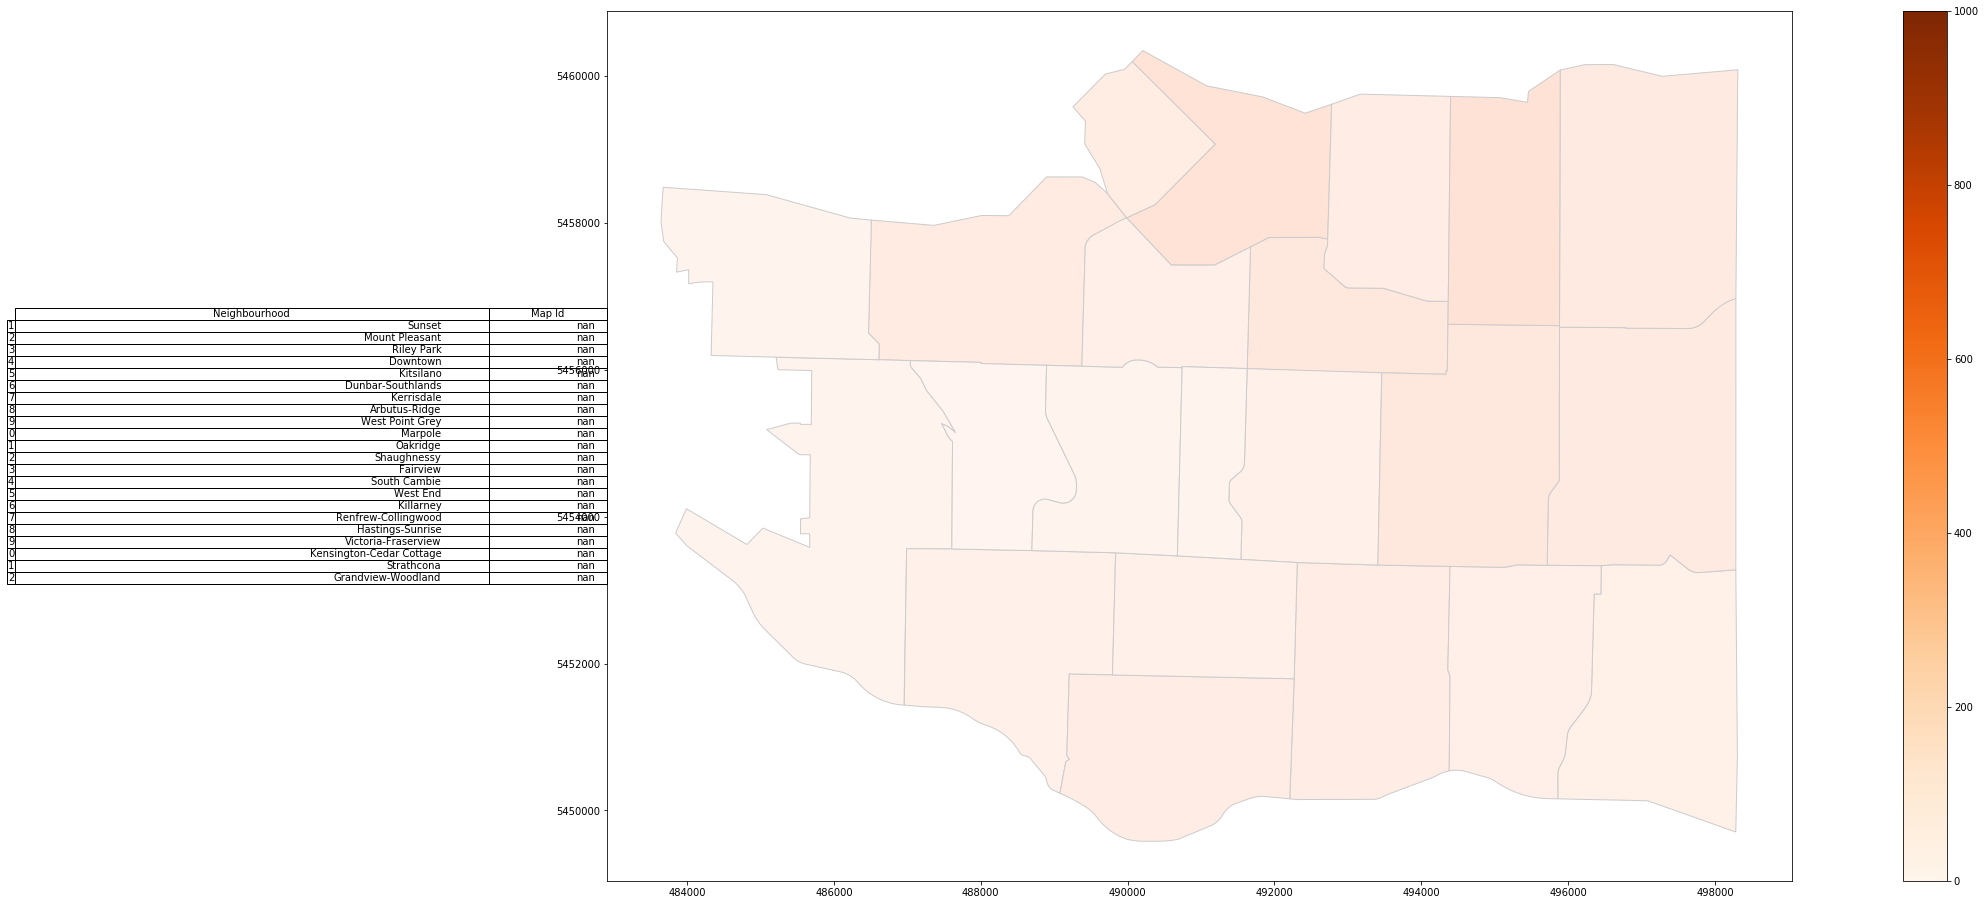

In [14]:
fig, ax = plt.subplots(1, figsize=(40, 16))

vmin, vmax = 0, 1000

bound.plot(cmap='Reds', column = 'TYPE_Count', ax=ax, linewidth=1, edgecolor='0.8',vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

tb = pd.DataFrame(bound.index)
tb.columns = ['Name']
tb['Id'] = lbnd_df['MAPID']
#tb['Reported Crimes'] = bound['TYPE_Count']

table = plt.table(cellText=tb.values,
                  rowLabels=(1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2),
                  colLabels=('Neighbourhood','Map Id'),
                  colWidths = [0.4,0.1],
                  fontsize = 120,
                  loc='left')

plt.savefig('2018.png')



In [6]:
df['YEAR'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

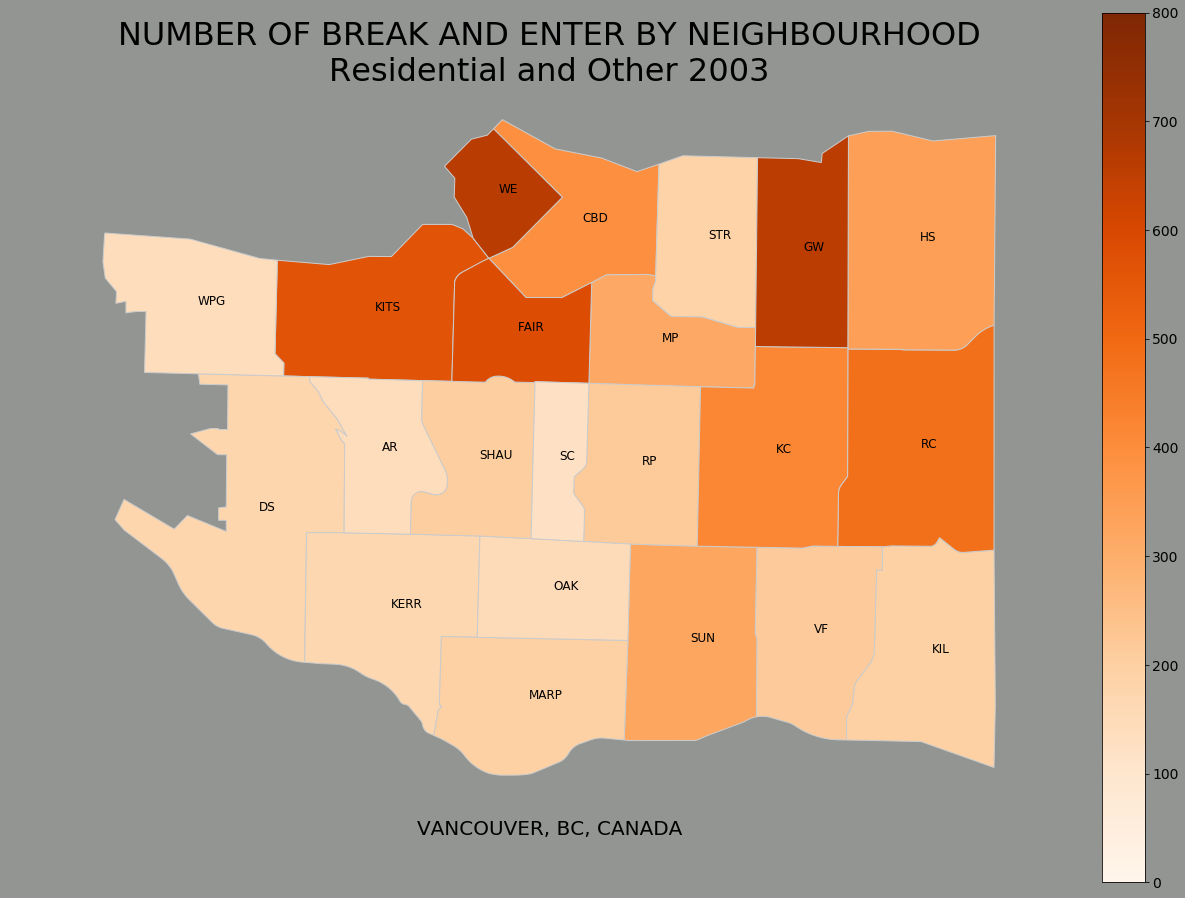

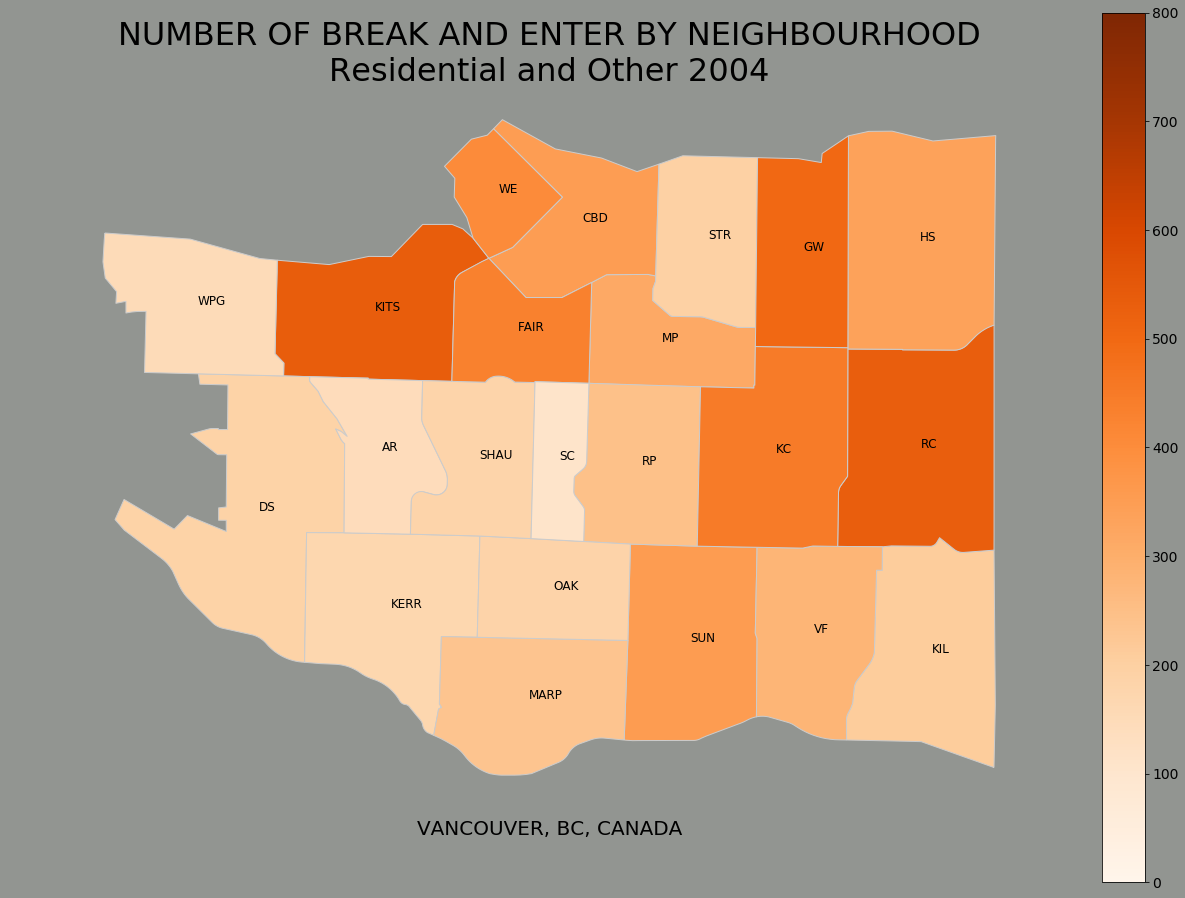

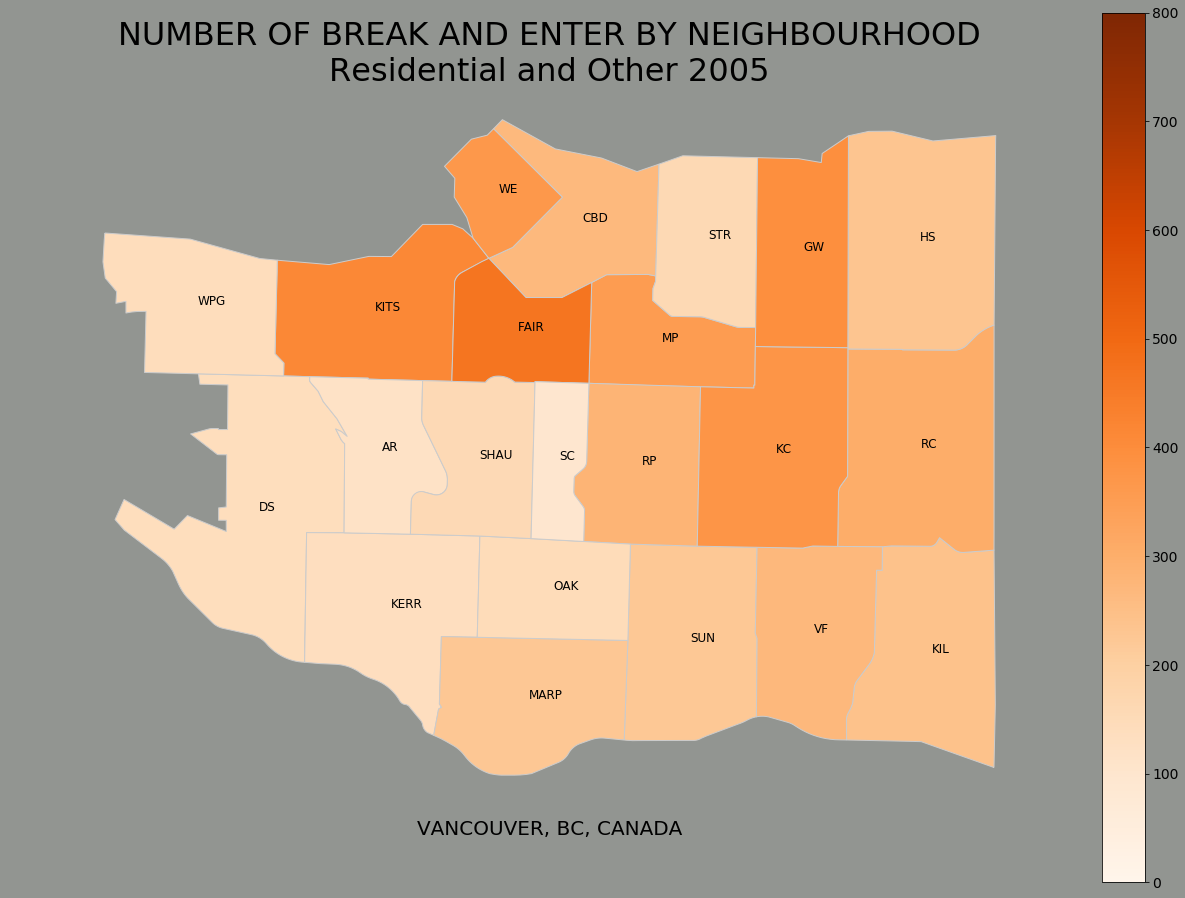

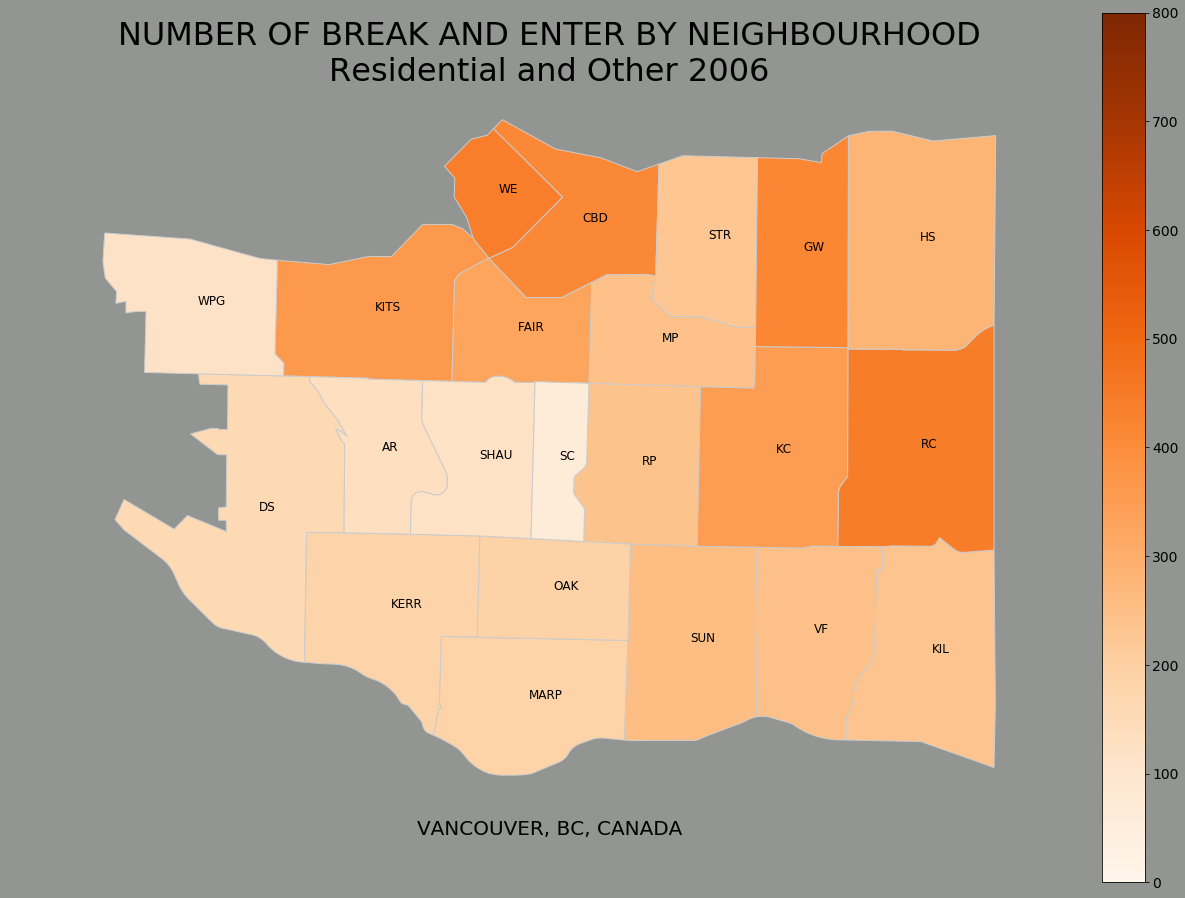

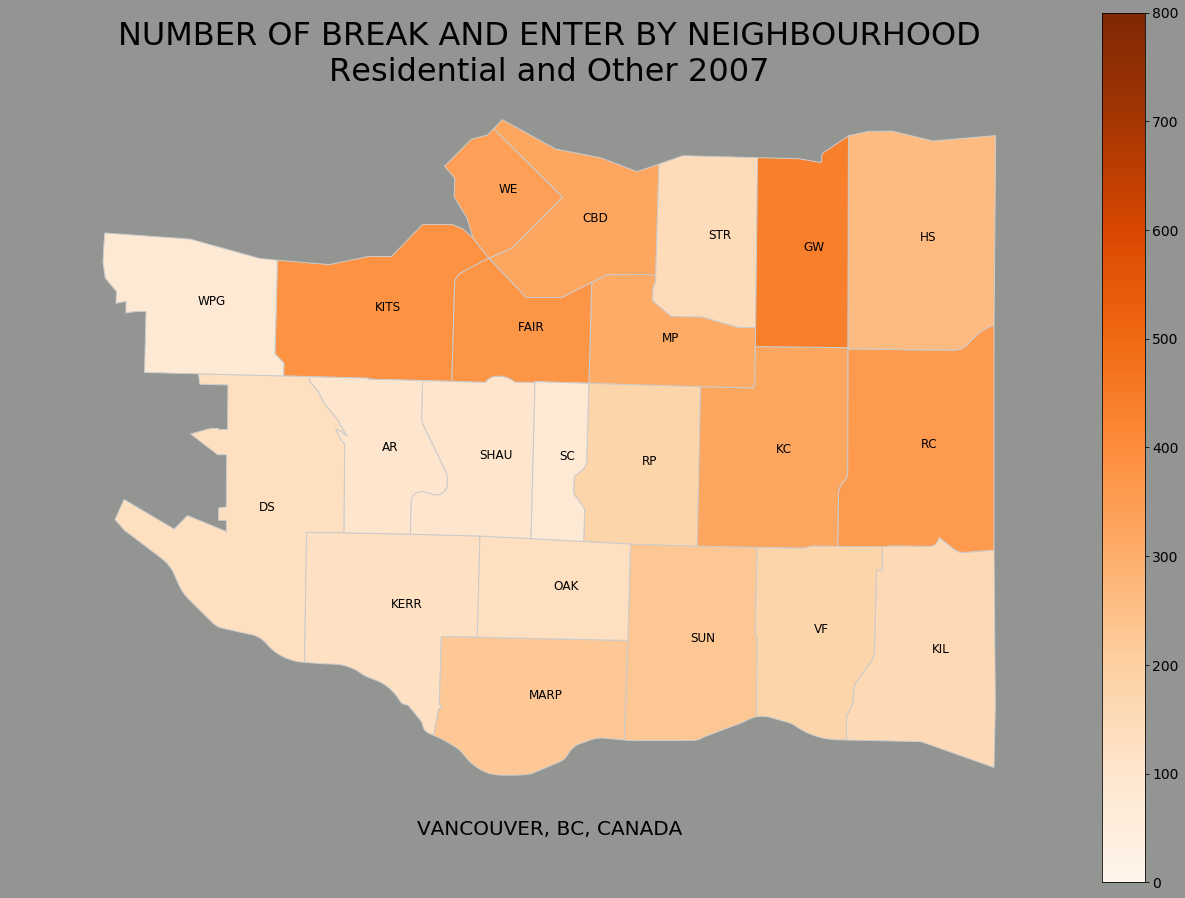

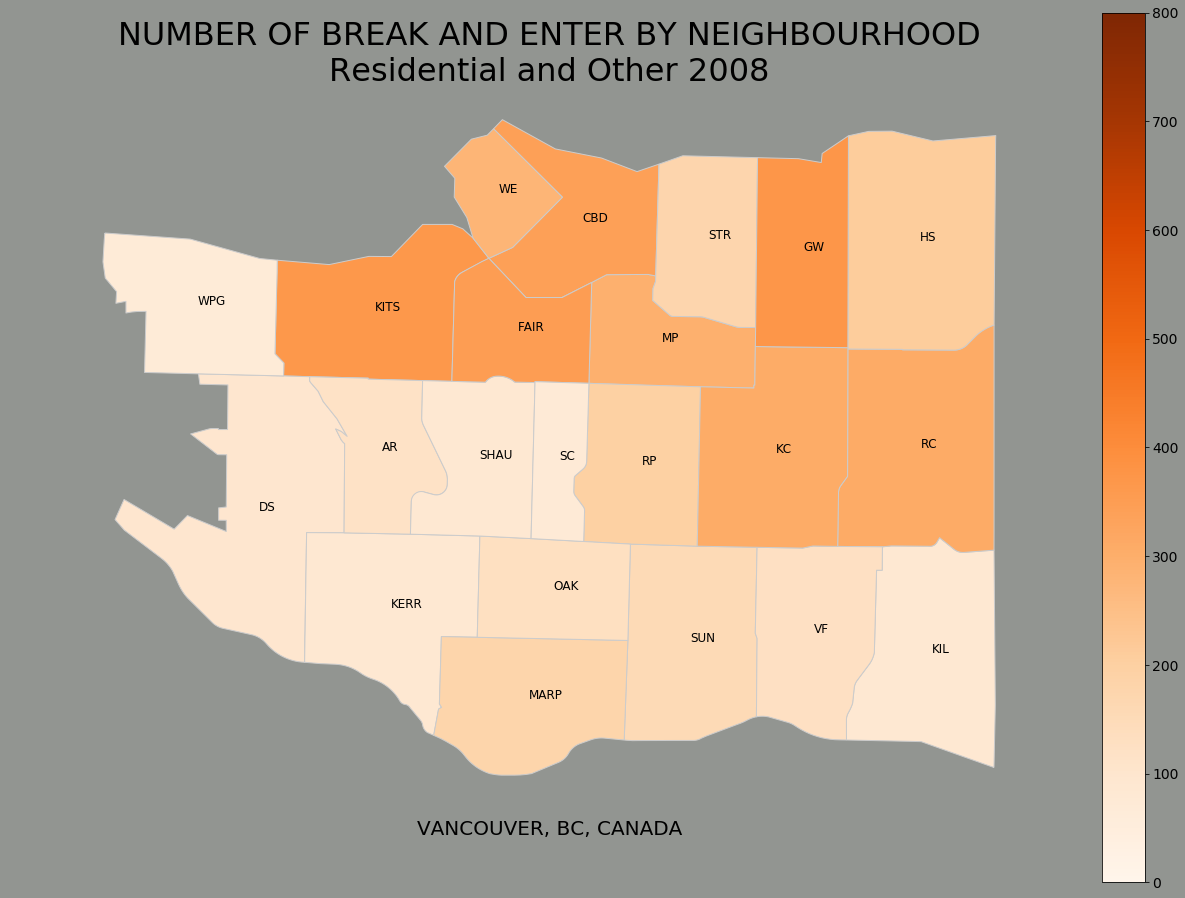

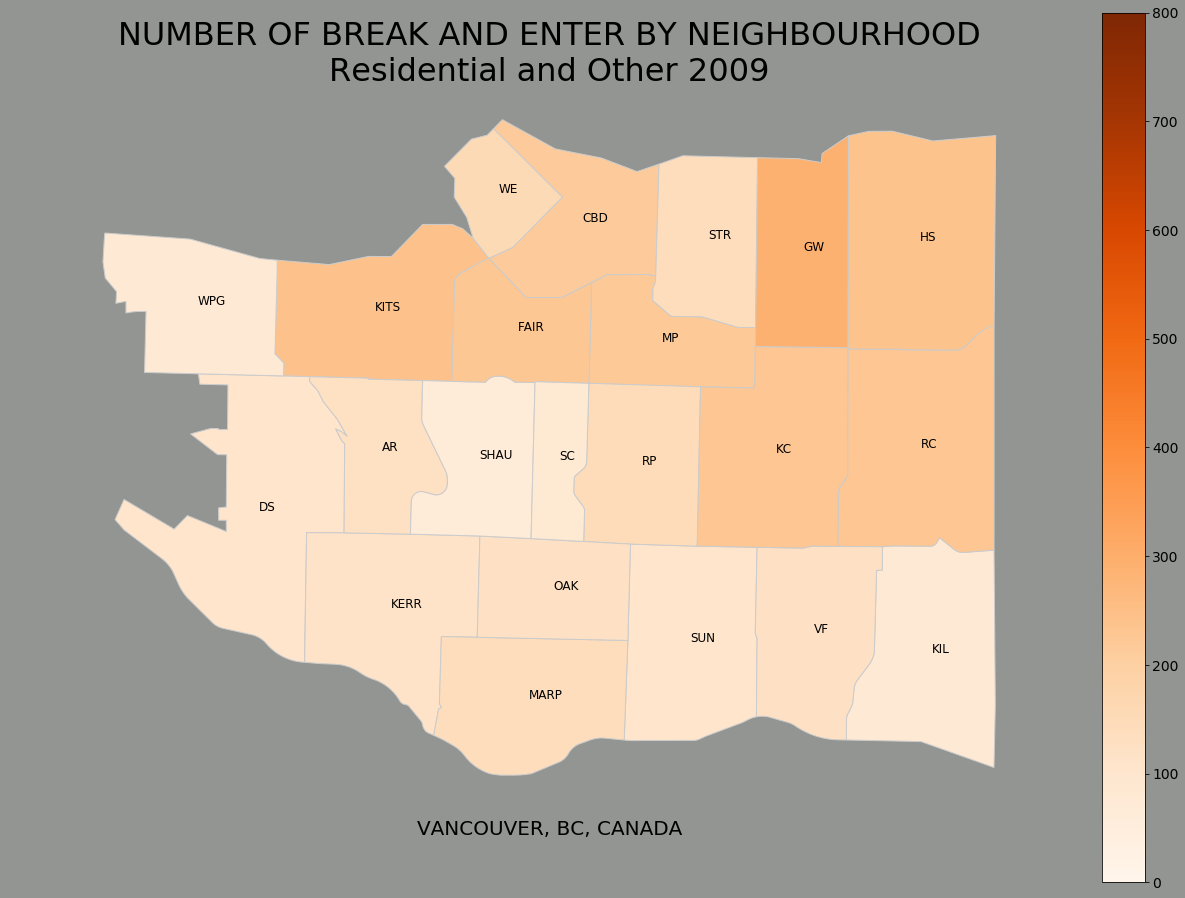

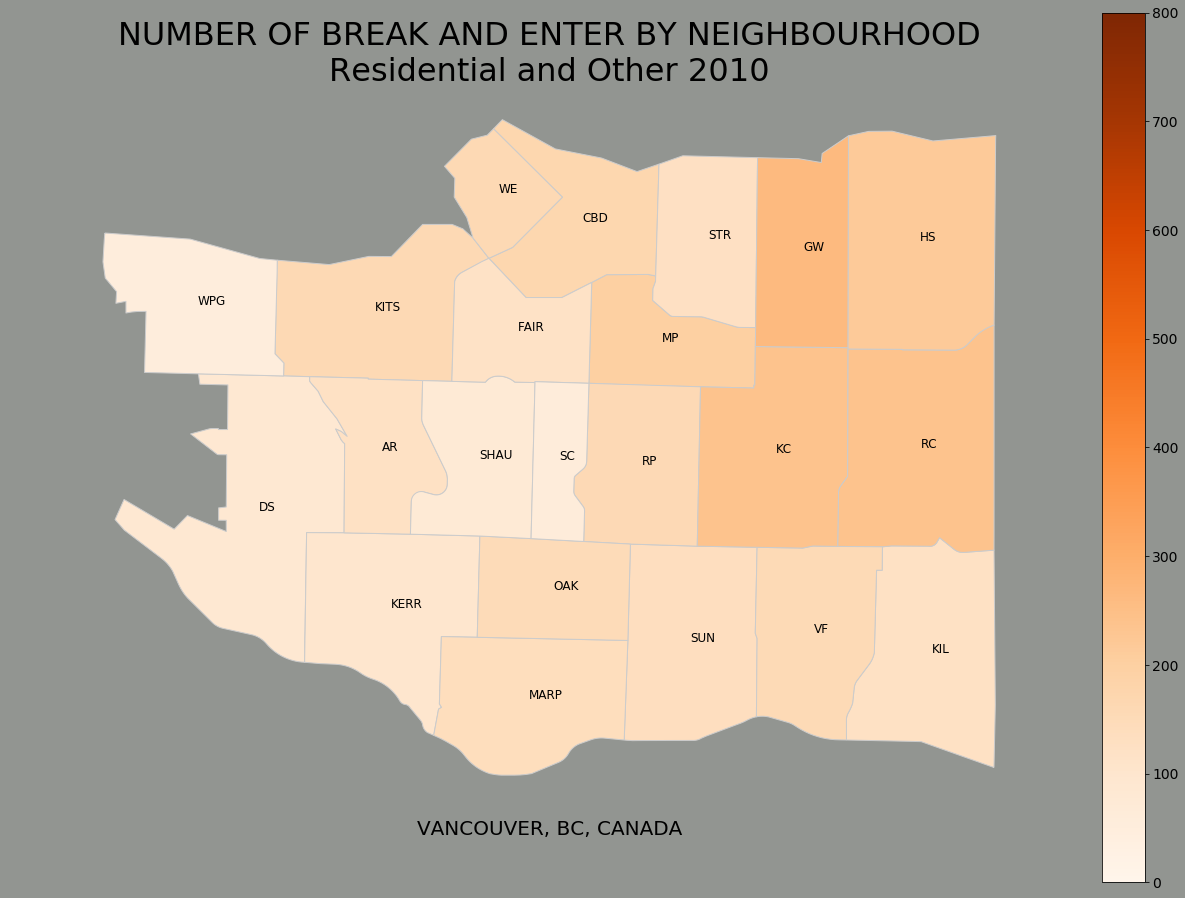

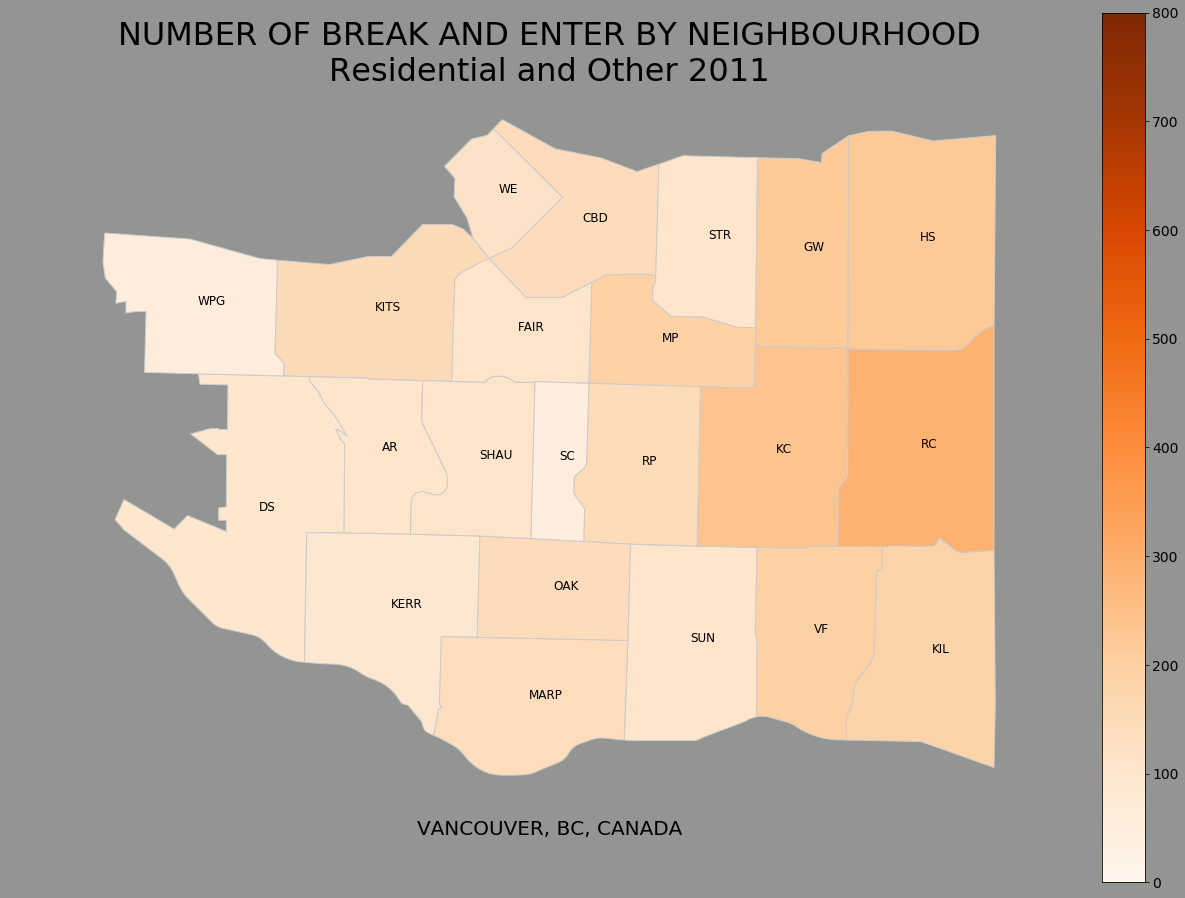

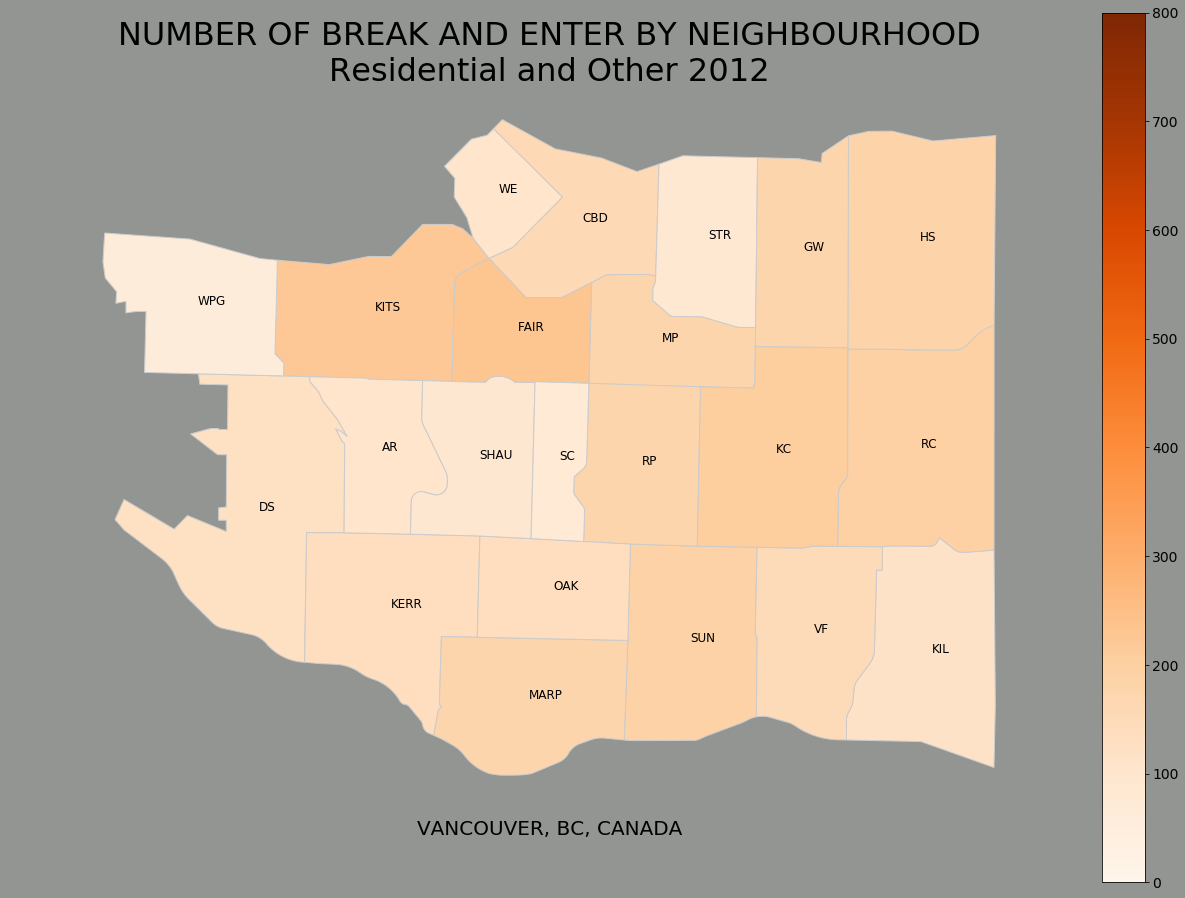

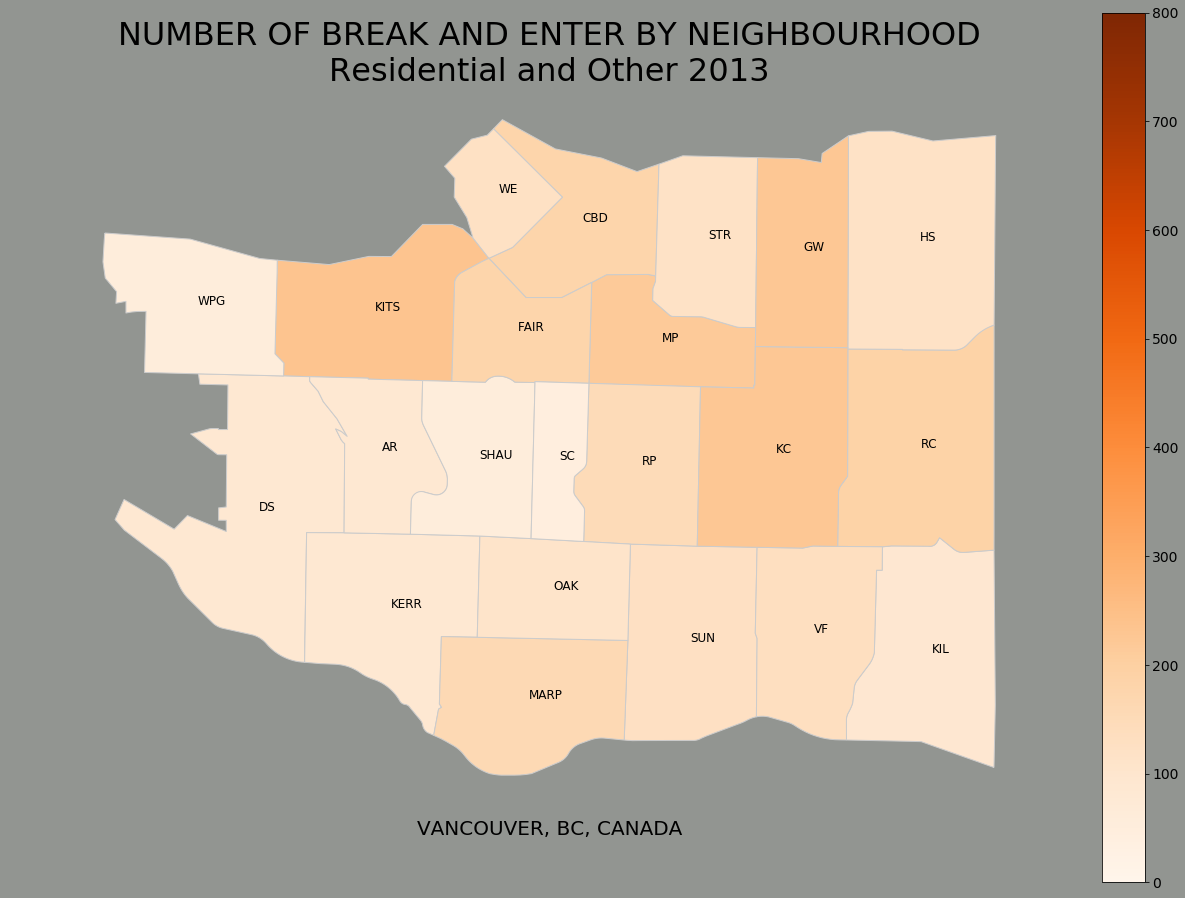

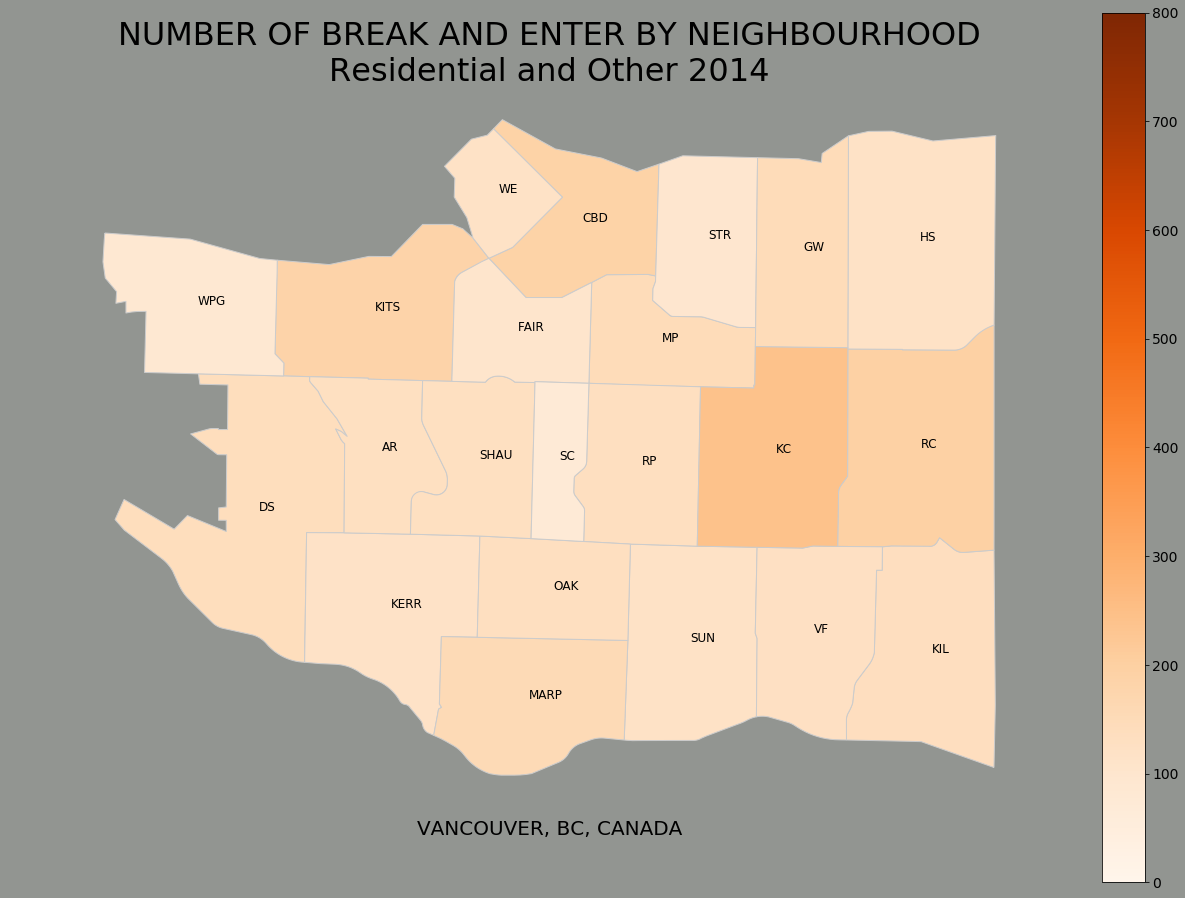

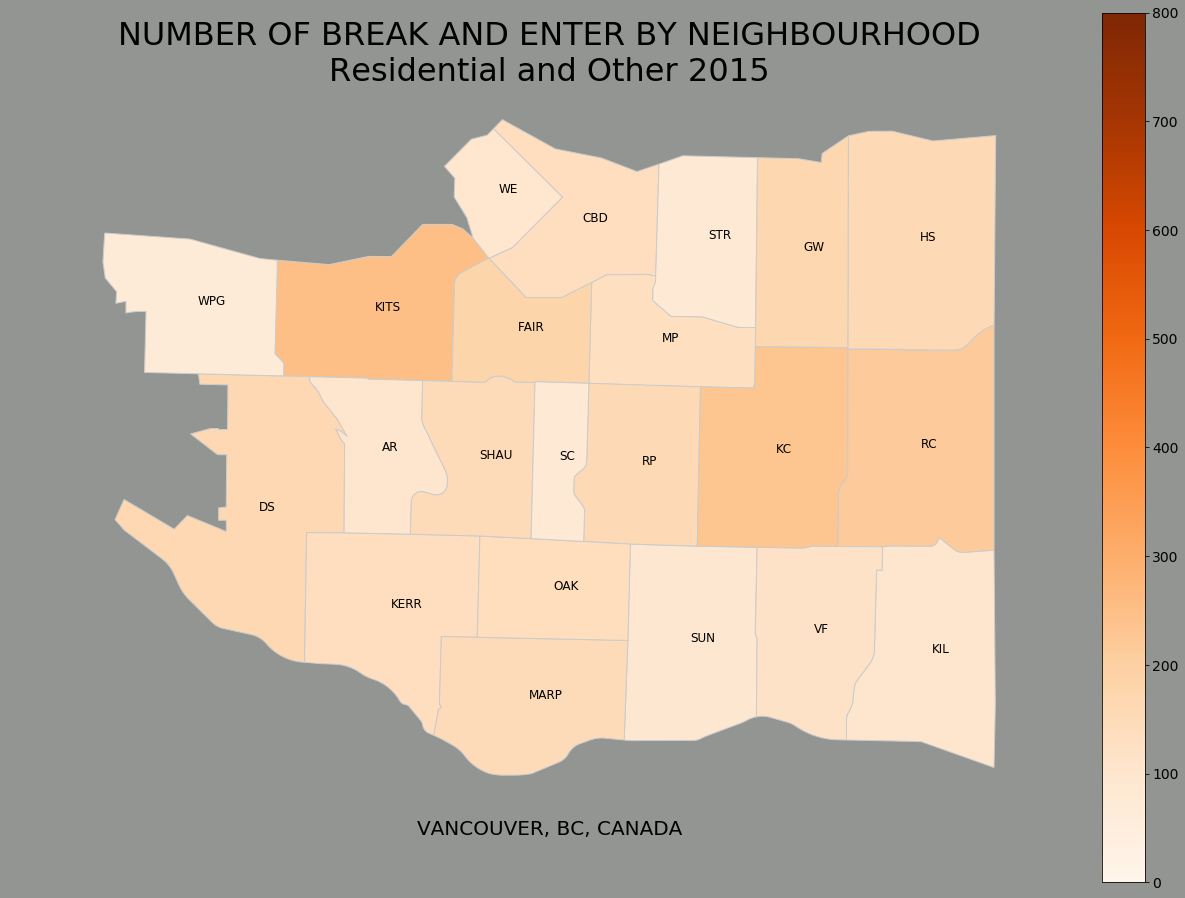

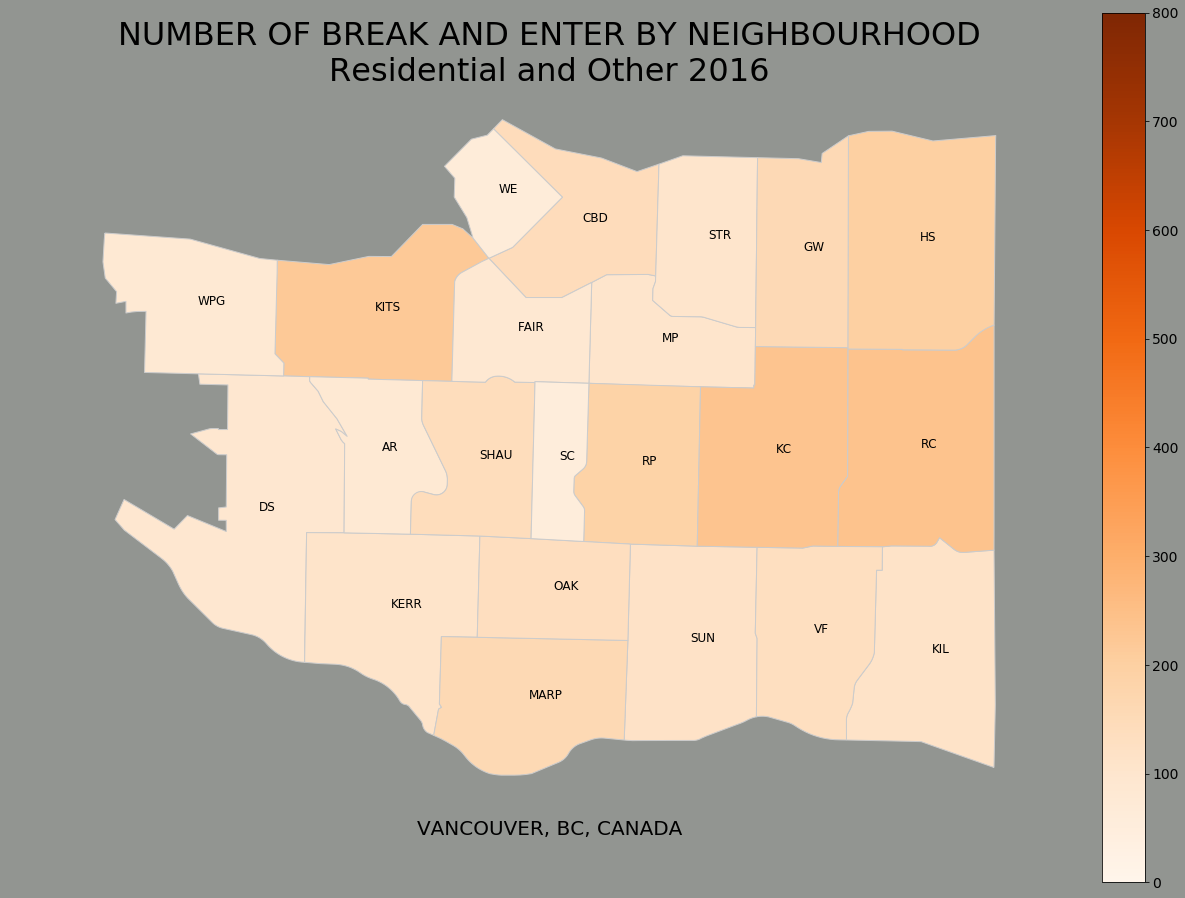

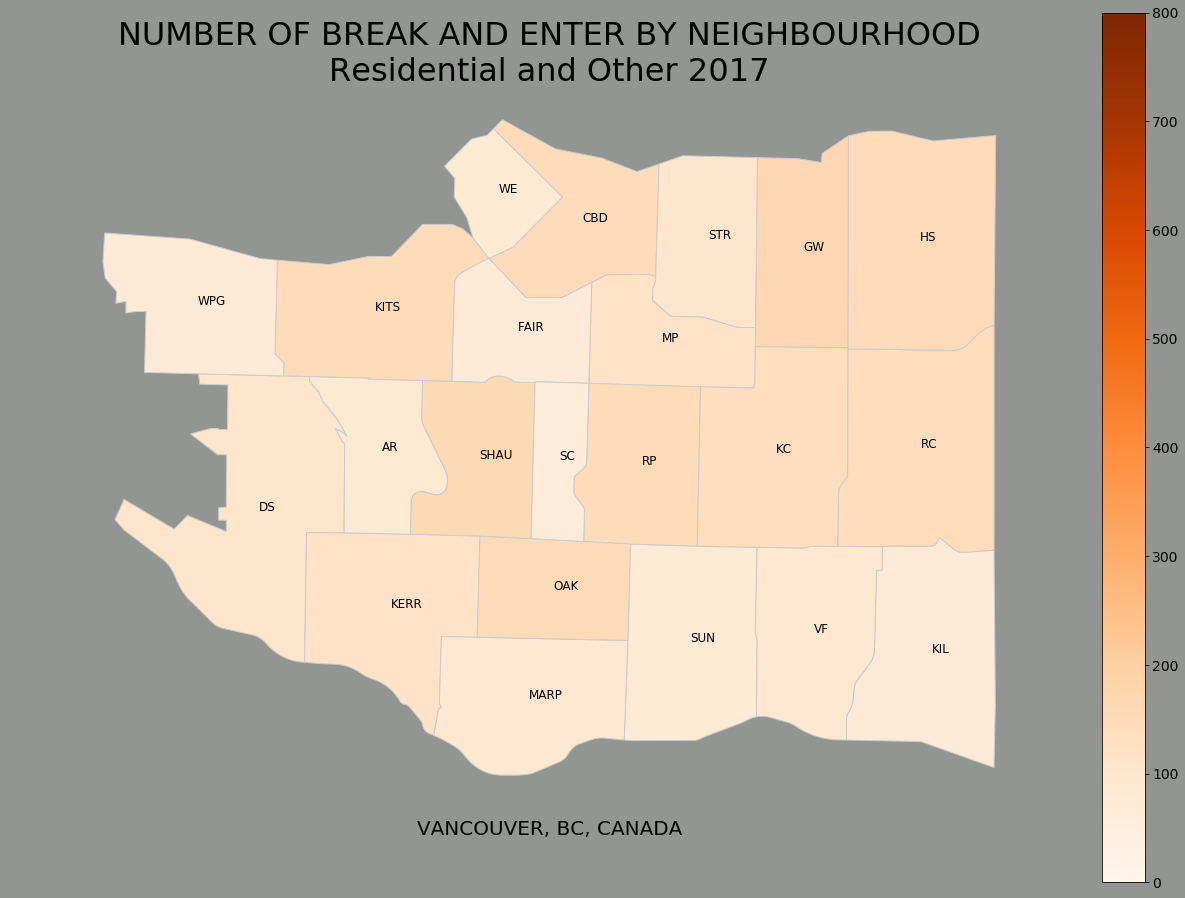

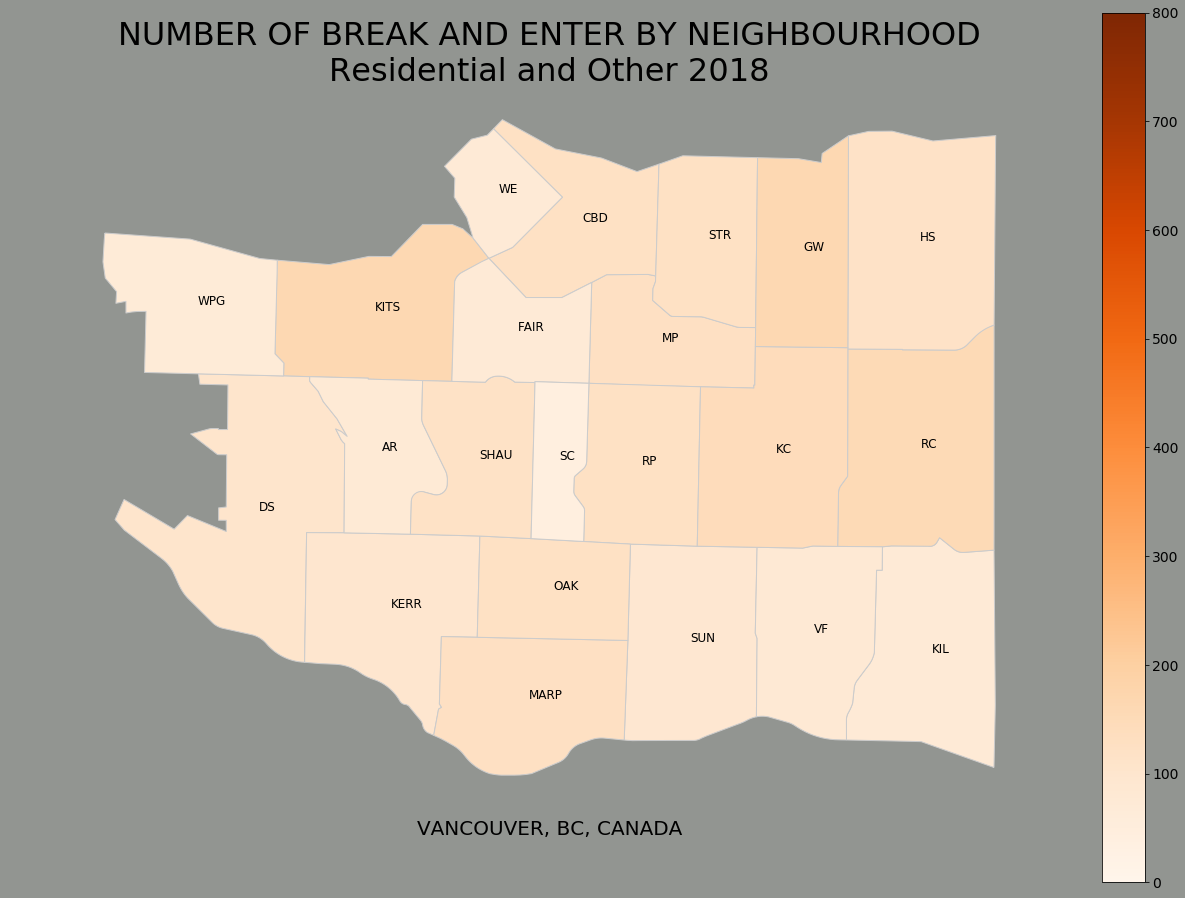

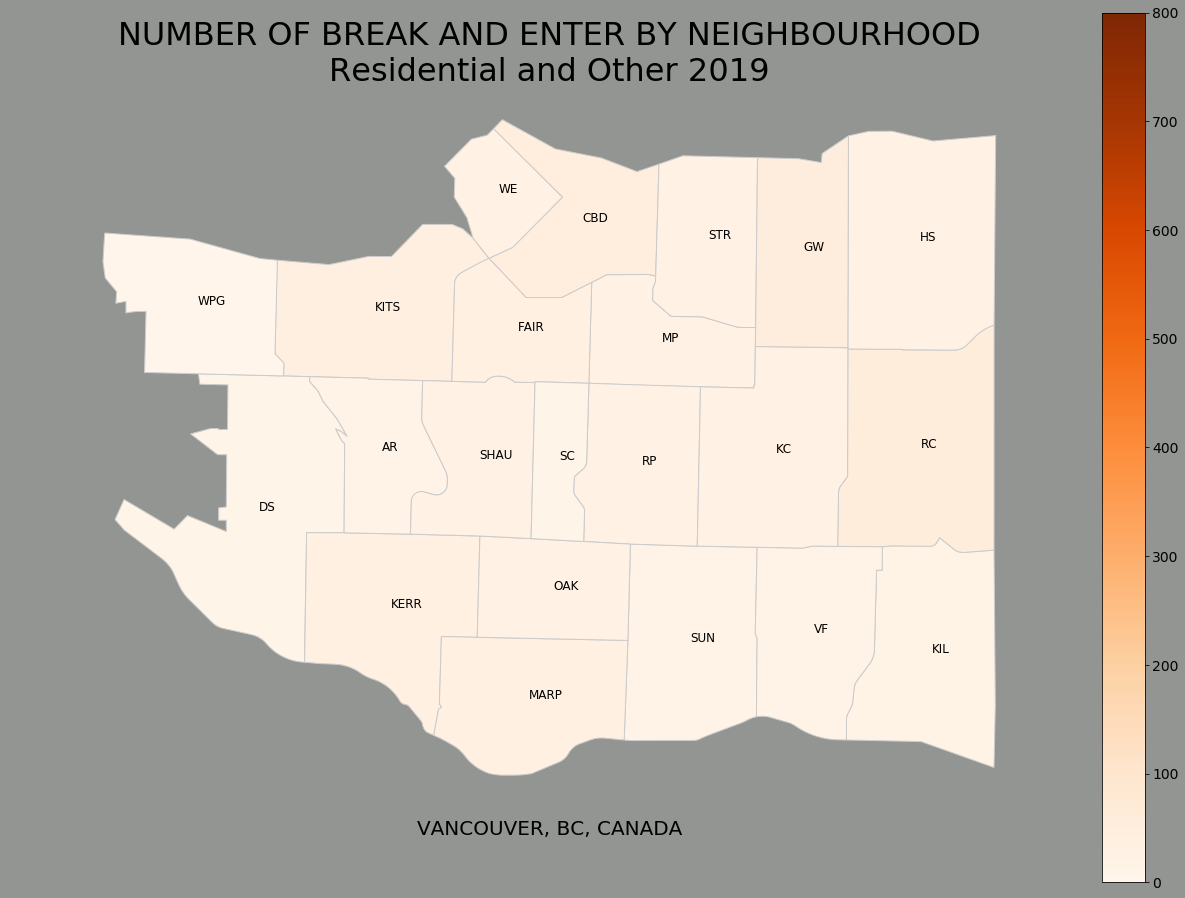

In [19]:
import geopandas as gpd
import matplotlib

for yr in df['YEAR'].unique():
    nb_list = prepare_data(df, yr, 'Break and Enter Residential/Other')
    
    lbnd = 'local_area_boundary.shp'
    lbnd_df = gpd.read_file(lbnd)
    
    tab = lbnd_df.copy()
    centroids = lbnd_df.copy()
    centroids.set_geometry(centroids["geometry"].centroid, inplace = True)
    
    lbnd_df = lbnd_df.set_index('NAME').join(nb_list.set_index('NEIGHBOURHOOD'))
    
    
    fig, ax = plt.subplots(1, figsize=(22, 16))
    fig.patch.set_facecolor('xkcd:grey')
    
    vmin, vmax = 0, 800

    lbnd_df.plot(cmap='Oranges', column = 'TYPE_Count', ax=ax, linewidth=1, edgecolor='0.8',vmin=vmin, vmax=vmax)

    sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    cbar.ax.tick_params(labelsize=14)

    texts=[]
    for x, y, label in zip(centroids.geometry.x, centroids.geometry.y, centroids['MAPID']):
        #if label in ['Downtown', 'Arbutus-Ridge']:
        texts.append(plt.text(x, y, label, fontsize = 12, color='black'))
    #5460500
    ax.text(488800, 5448600, r'VANCOUVER, BC, CANADA', fontsize=20)
    
    ax.set_title('NUMBER OF BREAK AND ENTER BY NEIGHBOURHOOD\nResidential and Other '+str(yr), fontdict = {
            'fontsize': 32,
            'fontweight' : 5,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
    
    ax.axis('off')
    
    plt.savefig(str(yr) + '.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [20]:
import imageio
filenames = ['2003.png', '2003.png', '2003.png', '2003.png','2004.png', '2005.png', '2006.png', '2007.png', 
             '2008.png', '2009.png', '2010.png','2011.png', '2012.png','2013.png',
             '2014.png','2015.png','2016.png','2017.png', '2018.png', '2018.png', '2018.png', '2018.png']
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
    
imageio.mimsave('movie.gif', images, duration=1)

In [60]:
[lbnd_df]

[                         MAPID  \
 NAME                             
 Sunset                     SUN   
 Mount Pleasant              MP   
 Riley Park                  RP   
 Downtown                   CBD   
 Kitsilano                 KITS   
 Dunbar-Southlands           DS   
 Kerrisdale                KERR   
 Arbutus-Ridge               AR   
 West Point Grey            WPG   
 Marpole                   MARP   
 Oakridge                   OAK   
 Shaughnessy               SHAU   
 Fairview                  FAIR   
 South Cambie                SC   
 West End                    WE   
 Killarney                  KIL   
 Renfrew-Collingwood         RC   
 Hastings-Sunrise            HS   
 Victoria-Fraserview         VF   
 Kensington-Cedar Cottage    KC   
 Strathcona                 STR   
 Grandview-Woodland          GW   
 
                                                                    geometry  \
 NAME                                                                         

In [11]:
n = ['Central Business District','Arbutus Ridge','Musqueam', 'Stanley Park']
df_unmatch = df[df.NEIGHBOURHOOD.isin(n)].copy()

In [12]:
import utm

lat = []
lon = []
for idx, value in enumerate(df_unmatch['X']):
    x, y = utm.to_latlon(value, df_unmatch.iloc[idx,-1], 10, 'U')
    lat.append(x)
    lon.append(y)
    
df_unmatch['lat'] = lat
df_unmatch['lon'] = lon

df_unmatch.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,lat,lon
0,Theft from Vehicle,2003,6,2,16.0,30.0,8XX RICHARDS ST,Central Business District,491347.04,5458514.73,49.279326,-123.118969
3,Theft from Vehicle,2003,8,27,18.0,0.0,8XX BURRARD ST,Central Business District,491066.19,5458945.81,49.283200,-123.122840
6,Mischief,2003,12,13,23.0,0.0,1XX W PENDER ST,Central Business District,492171.05,5458703.31,49.281034,-123.107644
15,Theft of Bicycle,2003,3,3,14.0,30.0,7XX W PENDER ST,Central Business District,491636.71,5459123.35,49.284805,-123.115000
17,Theft of Vehicle,2003,9,4,7.0,0.0,8XX BEATTY ST,Central Business District,491645.65,5458249.79,49.276947,-123.114858


In [13]:
df_unmatch.shape

(141870, 12)

In [14]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import IFrame

plotly.tools.set_credentials_file(username='YOUR_USERNAME', api_key='YOUR_KEY')
mapbox_access_token = 'YOUR_ACCESS_TOKEN'

IFrame(src= "https://dash-simple-apps.plotly.host/dash-scattermapboxplot/", width="100%", height="850px", frameBorder="1")

data = [
    go.Scattermapbox(
        lat=df_unmatch['lat'],
        lon=df_unmatch['lon'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=1,
            color = 'rgba(163,22,19,0.8)',),
        text=df_unmatch['NEIGHBOURHOOD'],)]

layout = go.Layout(
    autosize=False,
    width=950,
    height=800,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=49.26,
            lon=-123.14 ),
        pitch=0,
        zoom=11,
        style='light' ),)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Vancouver Mapbox')

C:\Users\thiag\.conda\envs\Training\lib\site-packages\chart_studio\plotly\plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

C:\Users\thiag\.conda\envs\Training\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



df --> lbnd_df  
Central Business District = Downtown  
Arbutus Ridge = Arbutus-Ridge  
Musqueam = None  
Stanley Park = None